In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
import statsmodels.formula.api as smf

from sklearn import linear_model


# Background
- Most of the time, people believe that housing value in the city center, or the central business district (CBD), is the highest, for CBD provides employment opportunities and conveniences. Consequently, the housing value decreases as one move farther from the city center, so the property value is highly correlated to the distance from the property to the city center. However, this may not be true in Vancouver City.
- The geographical features of Vancouver are unique. The figure below shows the map of Vancouver. We can see that downtown Vancouver is located in north central Vancouver city, rather than, in the center of the city. And the University of British Columbia (UBC) is located in the western part of Vancouver

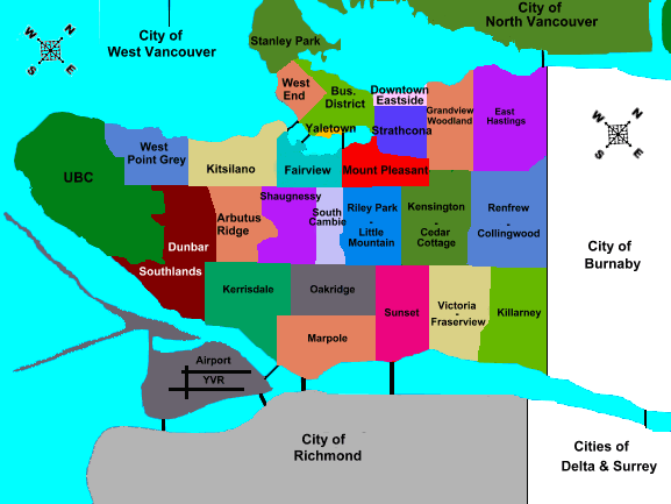

In [2]:
# Load the data
data = pd.read_csv('ubc.csv')

# Data Description

- The data is collected from the Multiple Listing Service (MLS) of the Real Estate Board of Greater Vancouver at 2010. It is a website which lists all the real estate information regarding the properties in Vancouver.
- MLS data is provided by realtors across Canada. The MLS has an online search engine for buyers to search for housing information based on their interests. On the listed house, each page includes single housing prices, location, square footage of the floor and lot, the number of bedrooms, the number of bathrooms etc.

In [3]:
data.describe()

,price,base,bed,bath,floor,lot,age,shopping,app,ubc,dt
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,1829.704469,0.805281,5.059406,3.894389,3058.629670,6545.539835,44.485149,0.425743,0.511551,10.131683,7.116502
std,1682.536301,0.396640,1.461346,1.730732,1533.714993,6895.991619,36.556755,0.495273,0.784176,4.276633,1.811678
min,488.000000,0.000000,2.000000,1.000000,710.000000,2174.000000,1.000000,0.000000,0.000000,1.800000,2.900000
25%,792.000000,1.000000,4.000000,2.000000,2100.000000,4026.000000,9.000000,0.000000,0.000000,6.350000,6.000000
50%,1300.000000,1.000000,5.000000,4.000000,2650.000000,4840.000000,37.000000,0.000000,0.000000,10.600000,7.100000
75%,2284.000000,1.000000,6.000000,5.000000,3615.000000,6805.700000,80.000000,1.000000,1.000000,13.650000,8.300000
max,16800.000000,1.000000,10.000000,8.000000,10318.000000,102860.000000,110.000000,1.000000,11.000000,17.500000,19.000000


- price: The price of the house at thousands of Canadian dollars.
- bed: The number of bedroom which is listed in MLC
- bath: The number of bathroom which is listed in MLC. They are all measured in half bathroom.
- floor: The floor size of the house which does not include the basement. It is measured in square feet.
- lot: The size of land which the house is built on. It is measured in square feet.
- age: The number of years since the house was built.
- shopping: Dummy variable indicating whether there is a shopping center nearby the house. 1 if the house is close to the shopping center, 0 otherwise.
- app: Dummy variable indicating whether there is appliance in the house while purchasing. 1 if the house has appliance, 0 otherwise.
- base: Dummy variable indicating whether the house has a basement. 1 if the house has a basement, 0 otherwise.
- ubc: The minimum driving distance between the house and the University of British Columbia, **considering the distances to both the western and southern entrances of the university. This distance is measured via Google Map**, see the figure below. And it is measured in kilometers.
- dt: The driving distance from the house to Pacific Mall in downtown. It is measured in kilometers.

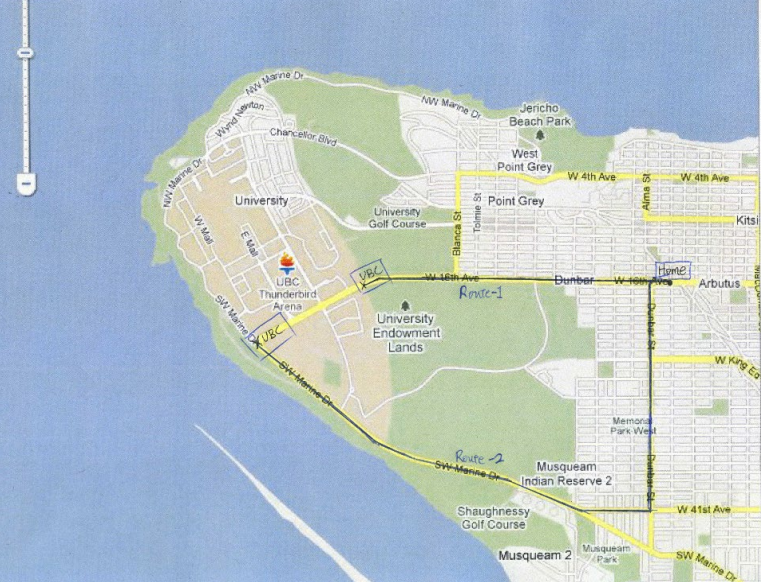


## Descriptive Statistics
- There are 303 observations in the dataset.
- The average price of the house is 1,829.70 k Canadian dollars. And the average distance to University of British Columbia(UBC) is 10.13 km. The average distance to Pacific Mall in downtown is 7.12 km.

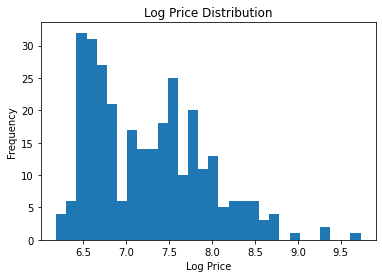

In [4]:
# Log Price distribution
data['lgprice'] = np.log(data['price'])
plt.hist(data['lgprice'], bins = 30)
plt.xlabel('Log Price')
plt.ylabel('Frequency')
plt.title('Log Price Distribution')
plt.show()

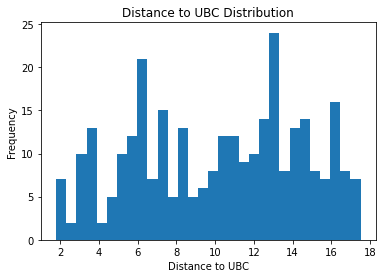

count    303.000000
mean      10.131683
std        4.276633
min        1.800000
25%        6.350000
50%       10.600000
75%       13.650000
max       17.500000
Name: ubc, dtype: float64

In [5]:
# Distance to UBC distribution
plt.hist(data['ubc'], bins = 30)
plt.xlabel('Distance to UBC')
plt.ylabel('Frequency')
plt.title('Distance to UBC Distribution')
plt.show()
data['ubc'].describe()

# Question:
## Basic Analysis
 Is housing price negatively correlated to the distance to downtown? Or is it negatively correlated to the distance to UBC? 
 I hypothesize that price of house properties increases as a housing location moves closer to UBC, rather than downtown.

First, we will run an OLS regression to see the relationship between the log price of the house and the distance to UBC and downtown. And we control the number of bedrooms, bathrooms, floor size, lot size, age, shopping, appliance, and basement in the regression.

In [6]:
X = data[['ubc', 'dt', 'bed', 'bath', 'floor', 'lot', 'age', 'shopping', 'app', 'base']]
X = sm.add_constant(X)
Y = data['lgprice']

# regression with intercept
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lgprice   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.875
Method:                 Least Squares   F-statistic:                     213.2
Date:                Wed, 08 May 2024   Prob (F-statistic):          7.58e-128
Time:                        14:54:17   Log-Likelihood:                 14.968
No. Observations:                 303   AIC:                            -7.936
Df Residuals:                     292   BIC:                             32.91
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.3186      0.105     69.806      0.000       7.112       7.525
ubc           -0.0644      0.004    -17.388      0.000      -0.072      -0.057
dt             0.0010      0.008      0.135      0.893      -0.014       0.016
bed           -0.0342      0.012     -2.951      0.003      -0.057      -0.011
bath           0.0459      0.015      3.008      0.003       0.016       0.076
floor          0.0002   1.59e-05     12.200      0.000       0.000       0.000
lot         1.658e-05   2.35e-06      7.041      0.000    1.19e-05    2.12e-05
age           -0.0023      0.000     -4.903      0.000      -0.003      -0.001
shopping      -0.0245      0.028     -0.881      0.379      -0.079       0.030
app            0.0366      0.018      2.007      0.046       0.001       0.072
base          -0.0345      0.035     -0.985      0.326      -0.104       0.035
==============================================================================
Omnibus:                       12.037   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.539
Skew:                           0.392   Prob(JB):                      0.00115
Kurtosis:                       3.677   Cond. No.                     7.73e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.73e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results:

- From the regression result, we can see that holding bed, bath, floor, lot, age, shopping, appliance, and basement constant, the log price of the house is significantly(p<0.01) negatively correlated to the distance to UBC. On average, the log price of the house decreases by 6.44% when the distance to UBC increases by 1 km holding other factors constant.
- In contrast, the log price of the house is not significantly(p=0.893) correlated to the distance to downtown.
- Hence, we can conclude that the price of house properties increases as a housing location moves closer to UBC, rather than downtown.

## Examine non-linear relationship
Next, we will explore the relationship between the log price and the distance to UBC further. We will divide the distance to UBC into serval groups and run an OLS regression to see the relationship between the log price and the distance to UBC in each group.
The intuition is that the distance to some certain point (e.g. national parks, downtown or universities) may be contributed to the housing price in some certain range. After that range, the distance may be less significant or even irrelevant to the housing price.

In [7]:
# Divide the distance to UBC into 9 groups
data['ubc_1_3'] = np.where((data['ubc'] >= 1) & (data['ubc'] < 3), 1, 0)
data['ubc_3_5'] = np.where((data['ubc'] >= 3) & (data['ubc'] < 5), 1, 0)
data['ubc_5_7'] = np.where((data['ubc'] >= 5) & (data['ubc'] < 7), 1, 0)
data['ubc_7_9'] = np.where((data['ubc'] >= 7) & (data['ubc'] < 9), 1, 0)
data['ubc_9_11'] = np.where((data['ubc'] >= 9) & (data['ubc'] < 11), 1, 0)
data['ubc_11_13'] = np.where((data['ubc'] >= 11) & (data['ubc'] < 13), 1, 0)
data['ubc_13_15'] = np.where((data['ubc'] >= 13) & (data['ubc'] < 15), 1, 0)
data['ubc_15_17'] = np.where((data['ubc'] >= 15) & (data['ubc'] < 17), 1, 0)
data['ubc_17_19'] = np.where((data['ubc'] >= 17) & (data['ubc'] < 19), 1, 0)


formula = "lgprice ~ ubc_1_3 + ubc_3_5 + ubc_5_7 + ubc_7_9 + ubc_9_11 + ubc_11_13 + ubc_13_15 + ubc_15_17 + ubc_17_19 + floor + lot + bed + bath + age + shopping + app + base"

model = smf.ols(formula, data = data).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lgprice   R-squared:                       0.905
Model:                            OLS   Adj. R-squared:                  0.900
Method:                 Least Squares   F-statistic:                     171.2
Date:                Wed, 08 May 2024   Prob (F-statistic):          4.78e-136
Time:                        14:54:18   Log-Likelihood:                 51.660
No. Observations:                 303   AIC:                            -69.32
Df Residuals:                     286   BIC:                            -6.187
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.1165      0.056    109.767      0.000       6.007       6.226
ubc_1_3        1.0193      0.065     15.646      0.000       0.891       1.148
ubc_3_5        1.0150      0.038     26.822      0.000       0.941       1.090
ubc_5_7        0.9966      0.032     31.377      0.000       0.934       1.059
ubc_7_9        1.0244      0.044     23.540      0.000       0.939       1.110
ubc_9_11       0.7784      0.037     20.939      0.000       0.705       0.852
ubc_11_13      0.3733      0.033     11.444      0.000       0.309       0.437
ubc_13_15      0.3139      0.032      9.948      0.000       0.252       0.376
ubc_15_17      0.2966      0.036      8.181      0.000       0.225       0.368
ubc_17_19      0.2990      0.073      4.096      0.000       0.155       0.443
floor          0.0002   1.54e-05     10.526      0.000       0.000       0.000
lot         1.372e-05   2.14e-06      6.408      0.000    9.51e-06    1.79e-05
bed           -0.0306      0.010     -2.922      0.004      -0.051      -0.010
bath           0.0460      0.014      3.320      0.001       0.019       0.073
age           -0.0024      0.000     -5.894      0.000      -0.003      -0.002
shopping      -0.0244      0.025     -0.978      0.329      -0.074       0.025
app            0.0199      0.017      1.203      0.230      -0.013       0.053
base          -0.0242      0.032     -0.764      0.446      -0.087       0.038
==============================================================================
Omnibus:                       14.443   Durbin-Watson:                   1.714
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.588
Skew:                           0.372   Prob(JB):                     5.58e-05
Kurtosis:                       3.999   Cond. No.                     7.09e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 5.89e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Results:

- From the regression results, we can see that the distance to UBC in all groups still has significant negative effects on the log price of the house.
- But we can also see that at range [1,3], [3,5], [5,7] and [7,9], the coefficients are bigger than the other groups. This indicates that the distance to UBC has lower effects on the log price when the distance gets larger, but it's still significant.

## Polynomial Regression Model Selection
Next, we will do a polynomial regression to explore more about the relationship between the log price and the distance to UBC. And we will do a model selection by minimizing Mallows C_J risk estimate for J = 1,2,3,...

In [8]:
def series_regression(X, Y, J):
    """
    :param X: N x 1 vector of observations on the regressor
    :param Y: N x 1 vector of observations
    :param J: scalar, the maximum degree of the polynomial
    :return: [beta, sigma2]
    beta: the estimated coefficients of the polynomial
    sigma2: the estimated variance of the regression error
    """

    N = len(X)  # Number of observations
    W = {}
    for j in range(0, J):
        W[j] = X ** j  # Store the powers of X
    W = pd.DataFrame(W)
    # pi_hat_J = np.linalg.inv(W_J.T @ W_J) @ W_J.T @ Y  # Compute the OLS estimate of pi_hat_J
    # Y_hat = W_J @ pi_hat_J  # Compute the fitted values of Y
    regr = linear_model.LinearRegression(fit_intercept = False)
    # Fir the calorie demand model
    regr.fit(W, Y)
    Y_hat = regr.predict(W)
    SSR = np.sum((Y - Y_hat) ** 2)  # Compute the sum of squared residuals
    sigma2 = SSR / (N - J)  # Compute the OLS estimate of sigma2

    return [SSR, sigma2, regr.coef_]

In [9]:
def mallows_risk(X, Y, J, sigma2_tilde):
    """
    :param X: N x 1 vector of observations on the regressor
    :param Y: N x 1 vector of observations
    :param J: scalar, the maximum degree of the polynomial
    :param sigma2: scalar, the variance of the regression error
    :return: [C_J]
    C_J: the Mallows C_J risk estimate
    """

    N = len(X)
    [SSR, _, _] = series_regression(X, Y, J)  # Compute the OLS estimate of sigma2
    C_J = -N * sigma2_tilde + SSR + 2 * sigma2_tilde * J  # Construct the Mallows C_J risk estimate

    return C_J

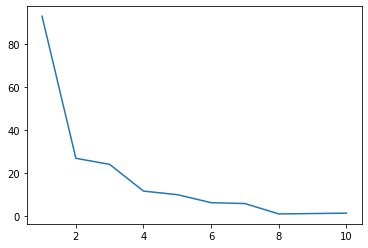

In [10]:
L = 10

[_, s2_hat, _] = series_regression(data['ubc'], data['lgprice'], L)  # To get a feasible estimate of sigma2

J_max = 10
J_values = [i for i in range(0, J_max + 1)]  # The range of J values
risk_table = np.zeros((len(J_values), 2))  # To store the risk estimates

m = 1
for J in range(1, J_max + 1):
    C_J = mallows_risk(data['ubc'], data['lgprice'], J, s2_hat)  # Compute the Mallows C_J risk estimate for each J
    risk_table[m, :] = [J, C_J]  # Store the risk estimates
    m += 1  # Update the counter

# Plot the risk estimates
fig = plt.figure()
ax = plt.axes()
ax.plot(risk_table[1:, 0], risk_table[1:, 1])

In [11]:
risk_table[0] = float('inf')  # fix the meaningless index 0 value to be inf
J_best = int(risk_table[np.argmin(risk_table[:, 1]), 0])  # Choose J that minimizes the Mallows C_J risk
J_best

8

- From the Mallows C_J risk estimate, we can see that the best polynomial regression is the one with J = 8.
- Next, let's see the best polynomial regression plot

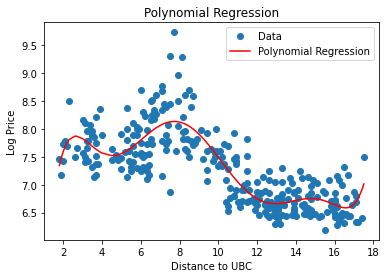

array([-5.15488468e+00,  1.57960273e+01, -7.38529929e+00,  1.71299090e+00,
       -2.15334852e-01,  1.48977611e-02, -5.33479151e-04,  7.72747870e-06])

In [12]:
# Plot the best polynomial regression
[SSR, sigma2, beta] = series_regression(data['ubc'], data['lgprice'], J_best)

# Sort the data to plot the fitted values
dt_sort = pd.DataFrame()
dt_sort['ubc'] = data['ubc']
dt_sort['lgprice'] = data['lgprice']
dt_sort.sort_values(by = 'ubc', inplace = True)

# Assign the sorted data to X and Y
X = dt_sort['ubc']
Y = dt_sort['lgprice']
N = len(X)

W = {}
for j in range(0, J_best):
    W[j] = X ** j  # Store the powers of X
W = pd.DataFrame(W)

Y_hat = W @ beta  # Compute the fitted values of Y

fig = plt.figure()
ax = plt.axes()
ax.plot(X, Y, 'o', label = 'Data')
ax.plot(X, Y_hat, 'r', label = 'Polynomial Regression')
plt.xlabel('Distance to UBC')
plt.ylabel('Log Price')
plt.title('Polynomial Regression')
plt.legend()
plt.show()
beta

- From the figure, we can see that the polynomial regression with J = 8 fits the data well, and the coefficients are showed above. This indicates that the relationship between the log price and the distance to UBC is non-linear. 
- The distance to UBC does matter at range [8,12] because the log price decreases quickly in this range. After that, the log price seems to be stable.
- For the distance at range [1,9], the scatter plot reveals considerable variability in housing prices at similar distances to UBC. This suggests that while distance to UBC may be an important determinant of housing prices, other factors such as lot size, number of bedrooms, or age conditions also play a role in determining prices.
- For the distance at range [12,18], the scatter plot reveals less variability in housing prices at similar distance to UBC. This also suggests that other factors may be more important in determining prices in this range.

## Sub-Sample Analysis

In [13]:
# ubc < 9
sub_data = data[data['ubc'] < 9]
X = sub_data[['ubc', 'dt', 'bed', 'bath', 'floor', 'lot', 'age', 'shopping', 'app', 'base']]
X = sm.add_constant(X)
Y = sub_data['lgprice']

# regression with intercept
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lgprice   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.782
Method:                 Least Squares   F-statistic:                     45.82
Date:                Wed, 08 May 2024   Prob (F-statistic):           1.73e-35
Time:                        14:54:18   Log-Likelihood:                 10.908
No. Observations:                 126   AIC:                            0.1839
Df Residuals:                     115   BIC:                             31.38
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0154      0.210     33.358      0.000       6.599       7.432
ubc            0.0020      0.013      0.153      0.879      -0.024       0.029
dt             0.0011      0.015      0.074      0.941      -0.030       0.032
bed           -0.0376      0.020     -1.873      0.064      -0.077       0.002
bath           0.0379      0.021      1.826      0.070      -0.003       0.079
floor          0.0002   1.94e-05      8.871      0.000       0.000       0.000
lot         1.163e-05   2.46e-06      4.724      0.000    6.76e-06    1.65e-05
age           -0.0017      0.001     -2.251      0.026      -0.003      -0.000
shopping      -0.0496      0.046     -1.068      0.288      -0.142       0.042
app            0.0634      0.050      1.260      0.210      -0.036       0.163
base           0.0896      0.059      1.526      0.130      -0.027       0.206
==============================================================================
Omnibus:                        0.337   Durbin-Watson:                   1.380
Prob(Omnibus):                  0.845   Jarque-Bera (JB):                0.501
Skew:                           0.072   Prob(JB):                        0.779
Kurtosis:                       2.727   Cond. No.                     1.42e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results: In the sub-sample where the distance to UBC is less than 9 km, the distance to UBC is not significantly correlated with the log price of the house. Instead, floor size, lot size and the age are significant factors.

In [14]:
# ubc [9,12] 
sub_data = data[(data['ubc'] >= 8) & (data['ubc'] < 12)]
X = sub_data[['ubc', 'dt', 'bed', 'bath', 'floor', 'lot', 'age', 'shopping', 'app', 'base']]
X = sm.add_constant(X)
Y = sub_data['lgprice']

# regression with intercept
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lgprice   R-squared:                       0.891
Model:                            OLS   Adj. R-squared:                  0.872
Method:                 Least Squares   F-statistic:                     47.46
Date:                Wed, 08 May 2024   Prob (F-statistic):           3.10e-24
Time:                        14:54:18   Log-Likelihood:                 16.790
No. Observations:                  69   AIC:                            -11.58
Df Residuals:                      58   BIC:                             13.00
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          8.4164      0.345     24.391      0.000       7.726       9.107
ubc           -0.1581      0.031     -5.114      0.000      -0.220      -0.096
dt             0.0011      0.026      0.041      0.967      -0.050       0.052
bed           -0.0317      0.024     -1.336      0.187      -0.079       0.016
bath           0.1168      0.033      3.556      0.001       0.051       0.182
floor      -6.654e-05   5.08e-05     -1.309      0.196      -0.000    3.52e-05
lot         8.837e-05   1.61e-05      5.480      0.000    5.61e-05       0.000
age           -0.0030      0.001     -2.951      0.005      -0.005      -0.001
shopping      -0.0647      0.051     -1.263      0.212      -0.167       0.038
app            0.0171      0.020      0.858      0.394      -0.023       0.057
base           0.0578      0.070      0.828      0.411      -0.082       0.197
==============================================================================
Omnibus:                        0.436   Durbin-Watson:                   1.933
Prob(Omnibus):                  0.804   Jarque-Bera (JB):                0.590
Skew:                          -0.068   Prob(JB):                        0.745
Kurtosis:                       2.568   Cond. No.                     1.20e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.2e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results: In the sub-sample where the distance to UBC is between 8 and 12 km, the distance to UBC is significantly correlated with the log price of the house. The log price of the house decreases by 15.81% on average when the distance to UBC increases by 1 km holding other factors constant. And the number of bathroom, lot size and age are also significant factors.

In [15]:
# ubc > 12
sub_data = data[(data['ubc'] >= 12) & (data['ubc'] < 18)]
X = sub_data[['ubc', 'dt', 'bed', 'bath', 'floor', 'lot', 'age', 'shopping', 'app', 'base']]
X = sm.add_constant(X)
Y = sub_data['lgprice']

# regression with intercept
model = sm.OLS(Y, X)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                lgprice   R-squared:                       0.801
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     45.76
Date:                Wed, 08 May 2024   Prob (F-statistic):           2.69e-35
Time:                        14:54:18   Log-Likelihood:                 92.193
No. Observations:                 125   AIC:                            -162.4
Df Residuals:                     114   BIC:                            -131.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.1870      0.130     47.497      0.000       5.929       6.445
ubc           -0.0072      0.009     -0.821      0.413      -0.025       0.010
dt             0.0074      0.008      0.936      0.351      -0.008       0.023
bed           -0.0027      0.010     -0.284      0.777      -0.022       0.016
bath           0.0611      0.015      4.021      0.000       0.031       0.091
floor          0.0001   2.91e-05      3.584      0.000    4.66e-05       0.000
lot         6.595e-05   1.16e-05      5.699      0.000     4.3e-05    8.89e-05
age           -0.0019      0.000     -5.015      0.000      -0.003      -0.001
shopping       0.0068      0.023      0.290      0.773      -0.040       0.053
app            0.0251      0.027      0.940      0.349      -0.028       0.078
base          -0.0835      0.028     -2.977      0.004      -0.139      -0.028
==============================================================================
Omnibus:                        7.361   Durbin-Watson:                   1.470
Prob(Omnibus):                  0.025   Jarque-Bera (JB):                7.017
Skew:                           0.559   Prob(JB):                       0.0299
Kurtosis:                       3.314   Cond. No.                     6.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Results: In the sub-sample where the distance to UBC is between 12 and 18 km, the distance to UBC is not significantly correlated with the log price of the house. Instead, the number of bathroom, floor size, lot size, the age and the number of basement are significant factors.

Sub-sample Analysis Summary:

- When we divide samples into three groups based on the distance to UBC, we can see that the factor affecting the log price of the house varies in different ranges of the distance to UBC.
- For the house properties close or far to UBC (driving distance less than 9km or more than 12km), the distance does not significantly affect the price. There are other factors such as floor size, lot size, age, and the number of bathrooms that are more important.
- There do exist a range of distance to UBC (driving distance between 8km and 12km) where the distance to UBC is significantly correlated with the log price of the house. In this range, the log price of the house decreases by 15.81% on average when the distance to UBC increases by 1 km holding other factors constant.
- But the distance to downtown is always not significant.

# Conclusion

- We first run an OLS regression controlling the number of bedrooms, bathrooms, floor size, lot size, age, shopping, appliance, and basement. The result shows that the log price of the house is significantly negatively correlated to the distance to UBC. And the distance to downtown is not significant.
- Then, we divide the distance to UBC into 9 groups and run an OLS regression to see the non-linear relationship. The result shows that the distance to UBC in all groups still has significant negative effects on the log price of the house. But the coefficients are bigger at range [1,3], [3,5], [5,7] and [7,9] compared to the farther range.
- Next, we do a polynomial regression to explore more about the relationship between the price of properties and the distance to UBC. We select a polynomial with degree 8 by minimizing Mallows C_J risk estimate. The result shows that the relationship between the log price and the distance to UBC is non-linear. The distance to UBC does matter at range [8,12] because the log price decreases quickly in this range.
- Last, we run OLS for sub-samples to examine the effect of ubc in different samples. We divide the sample into three groups based on the distance to UBC, we can see that there may be other factors that are more important in determining the price of properties, rather than the distance to UBC in low or high distance range. But in the range [8,12], the distance to UBC is significantly correlated with the log price of the house. As for the distance to downtown, it is always not significant.
- Now, our hypothesis the price of house properties increases as a housing location moves closer to UBC, rather than downtown is confirmed. And there are other factors such as floor size, lot size, age, and the number of bathrooms that are important in determining the price of properties as well.

# Limitation

- Limited scope of analysis: We only examine the relationship between the price of properties and the distance to UBC and downtown. But we do not delve into the underlying reasons or mechanisms behind this relationship. Understanding the factors that drive the preference for proximity to UBC or the specific amenities and benefits associated with being closer to UBC would provide a more comprehensive understanding of the housing market dynamics. We can dive deeper into the relationship between the price of properties and these factors in the future.
- Limited geographic scope: We only focuses specifically on the relationship between the distance to UBC and housing prices, and does not consider the potential impact of distances to other important locations or amenities in the area. We may generalize it to other geographic regions or cities with different spatial characteristics in the future.
- Omitted variables: While we control for several housing attributes such as bedrooms, bathrooms, floor size, lot size, age, shopping, appliance, and basement, there may be other important variables that are not included in the analysis. Factors such as neighborhood characteristics, school quality, crime rates, or access to public transportation could also influence housing prices but are not accounted for in the current model.